In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%%matplotlib inline


UsageError: Line magic function `%%matplotlib` not found.


In [5]:
df = pd.read_csv('./automobileEDA.csv')

df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# GroupBy() In Python

Use the GroupBy() function to group data by a column name.
    - Can be applied to catergorical data.
    - Can group data into categories
    - Single or multiple varaibles

Basically what you do using with `GroupBy()` is to split the data into groups based on some criteria, apply a function to each group independently and then combine the results into a data structure.


In [6]:
df['drive-wheels'].unique()


array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on everage, which tyupe of drive wheel is most valuable, we can group 'drive-wheels' and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".



In [8]:
df_group_one = df[['drive-wheels','body-style','price']]

df_group_one.head()



,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [9]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one


/tmp/ipykernel_190813/1093807078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


We can also group multiple columns. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.



In [10]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


The way that this is presented is kind of awkward, and it would take the pivot plot to make it more suitable to view.

## `pivot()` and `pivot_table()`

Use the `pivot()` method to visualise this type of data easily.


In [11]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [13]:
# Fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Heatmap

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.
- Use the heatmap to plot targe variable over multiple variables.


Let us use a heatmap to visualize the relationship between Body Style vs Price.


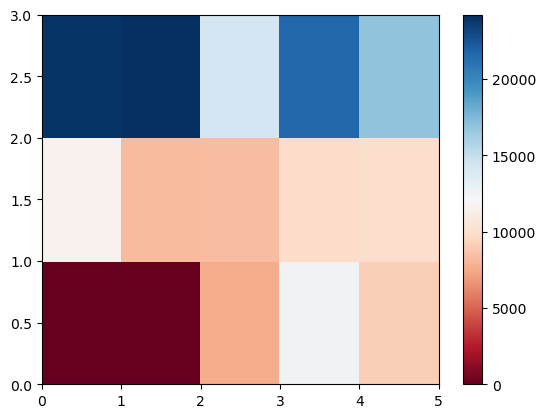

In [14]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


Let us stylize the heatmap a bit.

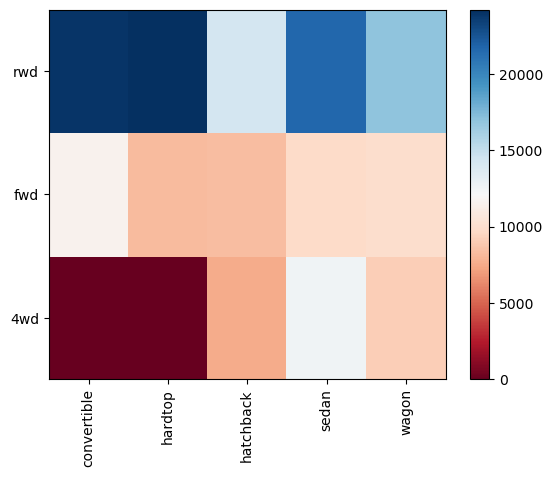

In [15]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


The visulaization is much easier to read. Visualization is very important in data analysis and will be treated in a separate notebook.

